In [184]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style  
style.use('default') 
# style.use('tableau-colorblind10') 
# style.use('seaborn-colorblind') 

In [124]:
os.chdir(r"G:\Araki\SMSigxModel\analysis\9_plot_code")
in_path = r"..\8_out\Mahurangi"
out_path = r"..\10_plot"

senario_names = ['KGE on Flow', 'KGE on Soil Moisture', 'KGE on seasonal transition', 'KGE on Flow + KGE on Soil Moisture', 'KGE on Flow + Seasonal Timing on Soil Moisture']

In [125]:
for i in range(1, 6):
    results_tot_metrics0 = pd.read_csv(os.path.join(in_path, f'ws2_ex{i}', 'post_evaluations.csv'), index_col=0)
    tot_metrics_names = results_tot_metrics0.columns
    results_tot_metrics0['senario_id'] = i
    if i==1:
        results_tot_metrics = results_tot_metrics0
    else:
        results_tot_metrics = pd.concat([results_tot_metrics, results_tot_metrics0])

results_tot_metrics

,KGE on Soil Moisture Content,KGE on Flow,season_transition on Soil Moisture Content (d2w_start),season_transition on Soil Moisture Content (d2w_end),season_transition on Soil Moisture Content (w2d_start),season_transition on Soil Moisture Content (w2d_end),senario_id
0,0.402927,0.623799,12.809037,30.304073,24.783301,23.447297,1
1,0.222009,0.772699,15.145144,18.605784,28.839850,29.130336,1
2,-0.330991,0.687770,17.000585,23.991486,26.641155,29.701668,1
3,0.443602,0.627383,9.770294,35.099762,19.616079,13.685517,1
4,0.438195,0.770600,12.594477,8.225853,29.287008,28.845208,1
...,...,...,...,...,...,...,...
9984,0.534606,0.808628,13.247091,29.842002,24.601748,23.393017,5
9985,0.659700,0.525507,6.144742,28.169781,29.544209,1.413094,5
9988,0.438128,0.730556,11.712312,6.365652,27.918386,26.826627,5
9993,0.090171,0.540584,11.481023,15.538421,21.614976,24.988065,5


In [126]:
if 'season' in tot_metrics_names[j]:
    print(tot_metrics_names[j])

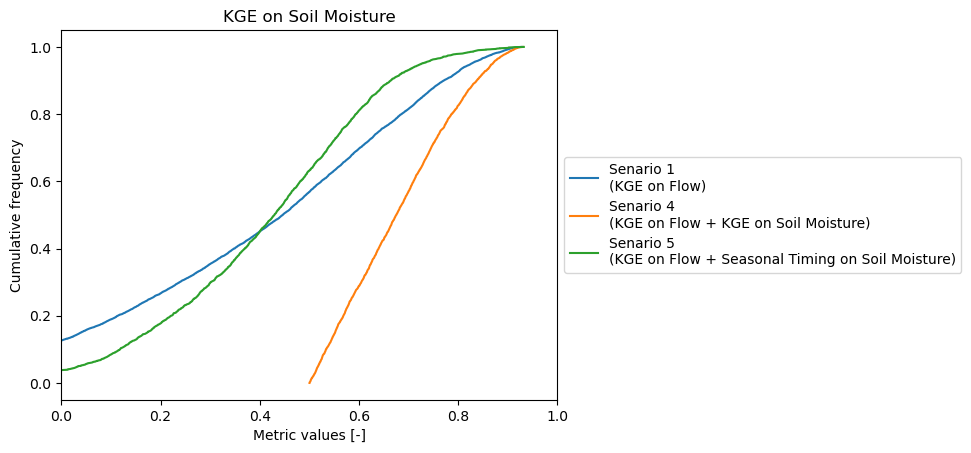

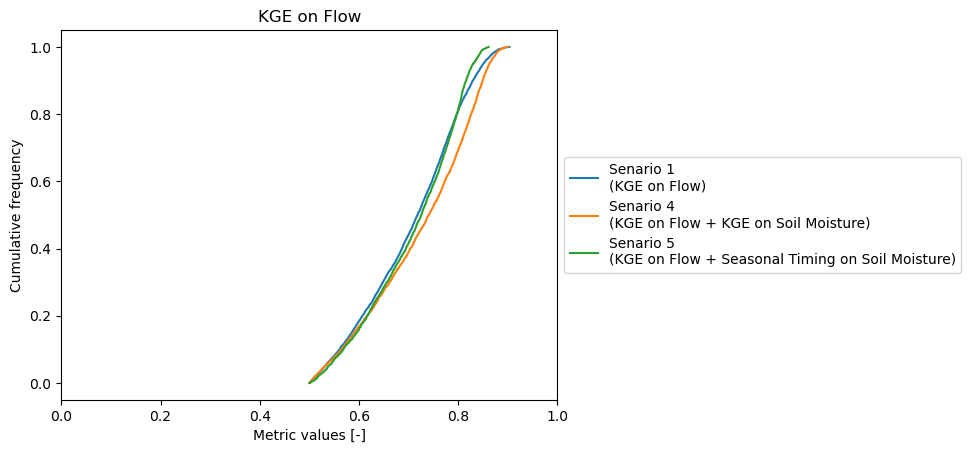

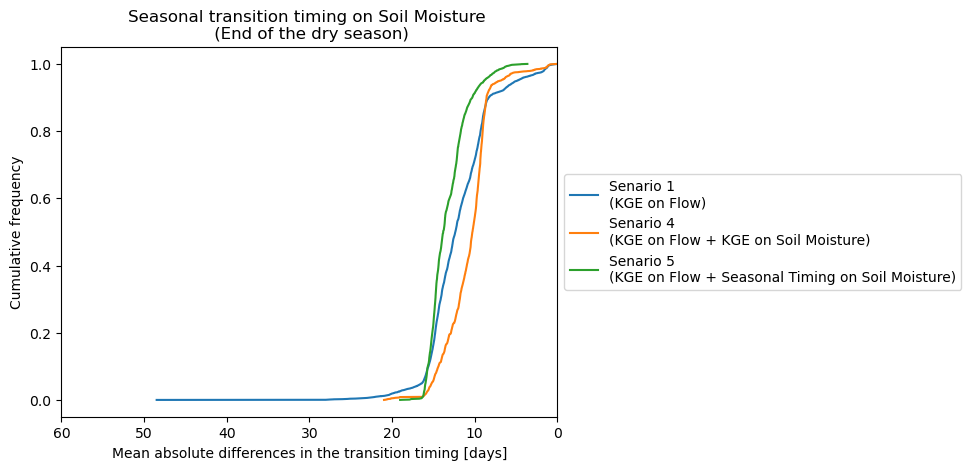

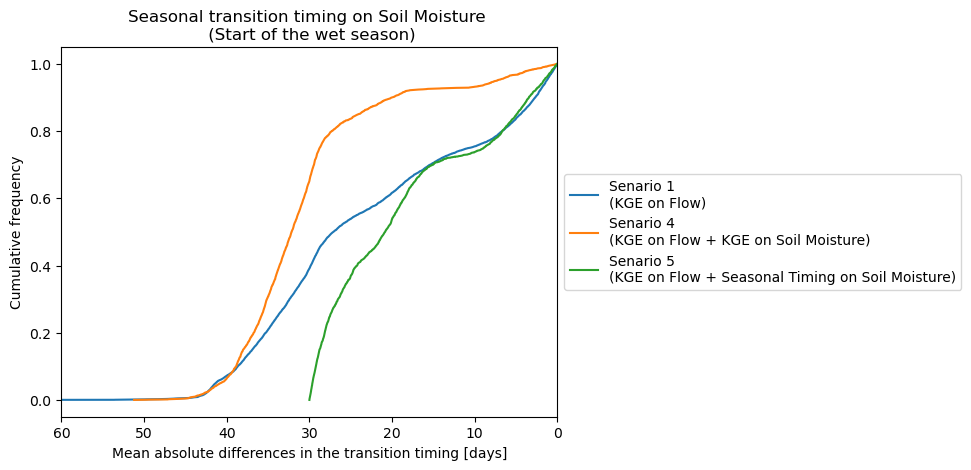

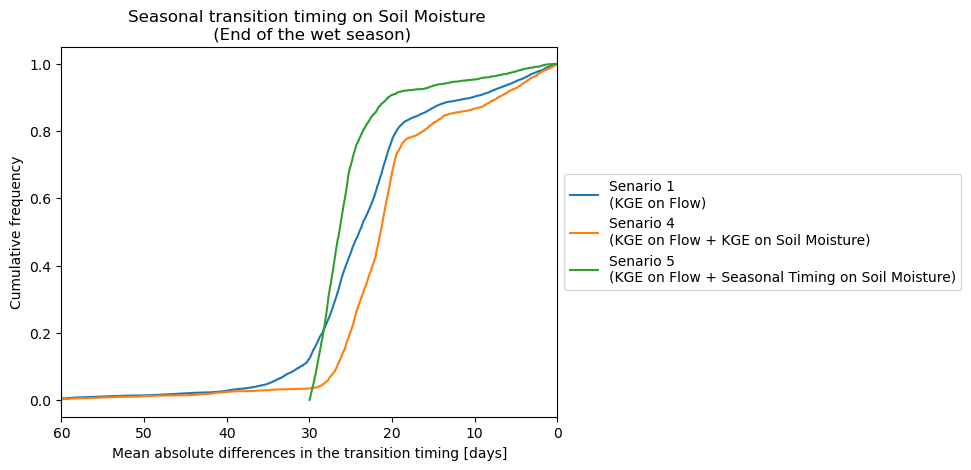

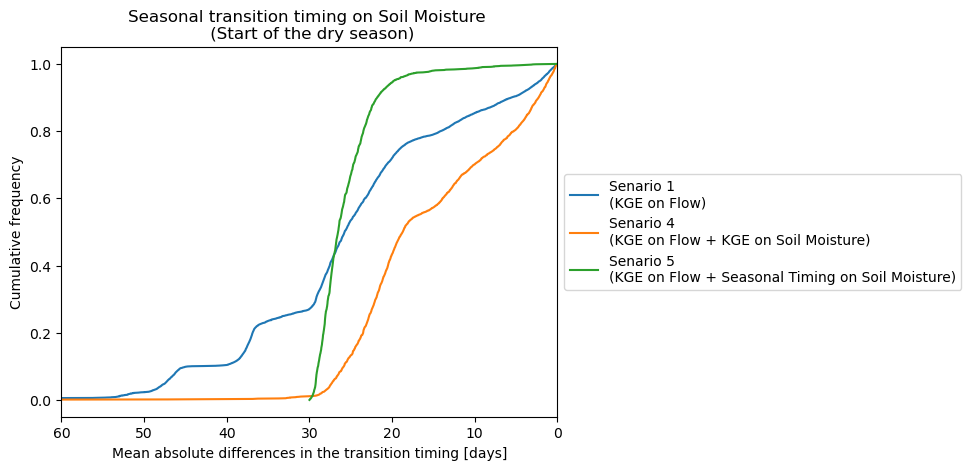

In [186]:
fig_title = ['KGE on Soil Moisture', 'KGE on Flow', 'Seasonal transition timing on Soil Moisture \n (End of the dry season)', 'Seasonal transition timing on Soil Moisture \n (Start of the wet season)', 
            'Seasonal transition timing on Soil Moisture \n (End of the wet season)', 'Seasonal transition timing on Soil Moisture \n (Start of the dry season)']
colors = ['#BCBCBC', '#3388B6', '#3388B6', '#3388B6', '#FF993E']

for j in range(len(tot_metrics_names)):
    fig, ax = plt.subplots()
    for i in [1,4,5]:
        data = results_tot_metrics[[tot_metrics_names[j], 'senario_id']][results_tot_metrics['senario_id']==i].copy()
        data_np = data[tot_metrics_names[j]].values

        # CDF 
        # https://www.statology.org/cdf-python/

        #sort data
        x = np.sort(data_np)
        
        if 'season' in tot_metrics_names[j]:
            x = x[::-1]
        
        #calculate CDF values
        y = 1. * np.arange(len(data_np)) / (len(data_np) - 1)
        
        #plot CDF
        plt.plot(x, y, label=f"Senario {i}\n({senario_names[i-1]})")
        
    if 'season' in tot_metrics_names[j]:
        ax.set_xlim([0, 60])
        ax.set_xlabel('Mean absolute differences in the transition timing [days]')
        ax.invert_xaxis()
    else:
        ax.set_xlabel('Metric values [-]')
        ax.set_xlim([0, 1])
    ax.set_title(fig_title[j])
    ax.set_ylabel('Cumulative frequency')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    fig.savefig(os.path.join(out_path, f'CDF_{tot_metrics_names[j]}.png'))

In [187]:
for i in range(1, 6):
    results_monthly_metrics0 = pd.read_csv(os.path.join(in_path, f'ws2_ex{i}', 'post_evaluations_monthly_metrics.csv'), index_col=0)
    monthly_metrics_names = results_monthly_metrics0.columns
    results_monthly_metrics0.index = pd.to_datetime(results_monthly_metrics0.index, format="%Y-%m-%d")
    results_monthly_metrics0['senario_id'] = i
    results_monthly_metrics0['Month'] = results_monthly_metrics0.index.month
    if i==1:
        results_monthly_metrics = results_monthly_metrics0
    else:
        results_monthly_metrics = pd.concat([results_monthly_metrics, results_monthly_metrics0])

results_monthly_metrics


,Q_mean_obs,Q_mean_sim,run_id,Q_mean_bias,high_flow_freq_obs,high_flow_freq_sim,high_flow_freq_bias,RR_obs,RR_sim,RR_bias,senario_id,Month
Time,,,,,,,,,,,,
1998-03-31,0.000028,5.422127e-06,0,-0.000023,0.013441,0.005376,-0.008065,0.162265,0.031122,-0.131142,1,3
1998-04-30,0.000015,8.606247e-07,0,-0.000015,0.000000,0.000000,0.000000,0.161294,0.008957,-0.152337,1,4
1998-05-31,0.000041,1.581225e-06,0,-0.000040,0.009409,0.000000,-0.009409,0.310268,0.011835,-0.298433,1,5
1998-06-30,0.000129,1.609045e-04,0,0.000032,0.054167,0.112500,0.058333,0.545168,0.681553,0.136384,1,6
1998-07-31,0.000604,7.306226e-04,0,0.000127,0.342742,0.563172,0.220430,0.770003,0.931980,0.161977,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...
2001-04-30,0.000098,2.744781e-05,9998,-0.000070,0.059722,0.027778,-0.031944,0.351672,0.098987,-0.252685,5,4
2001-05-31,0.000289,3.652636e-04,9998,0.000076,0.196237,0.436828,0.240591,0.582068,0.735274,0.153205,5,5
2001-06-30,0.000094,7.977410e-05,9998,-0.000014,0.012500,0.050000,0.037500,0.905890,0.772082,-0.133808,5,6


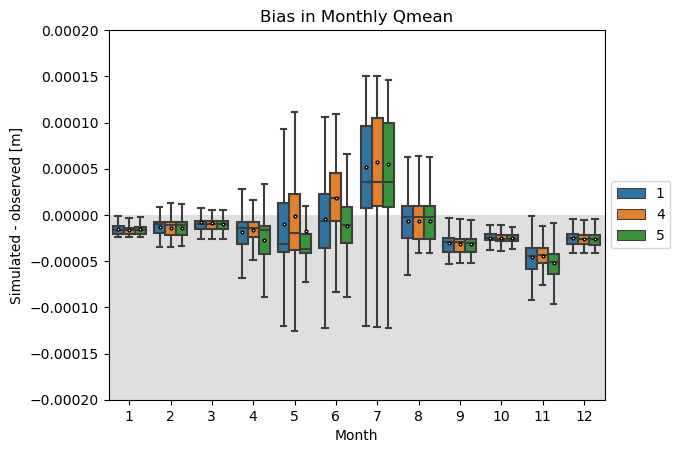

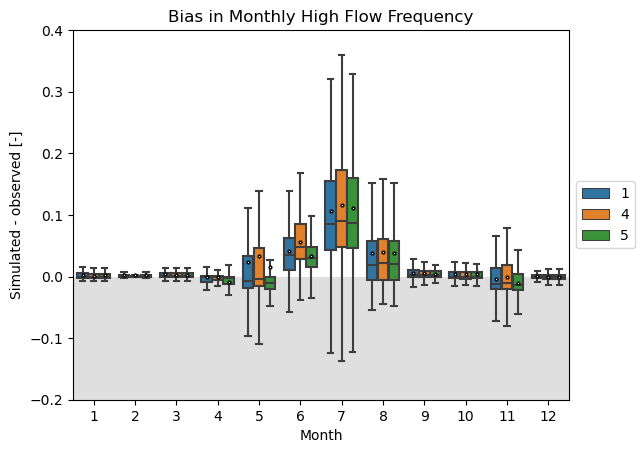

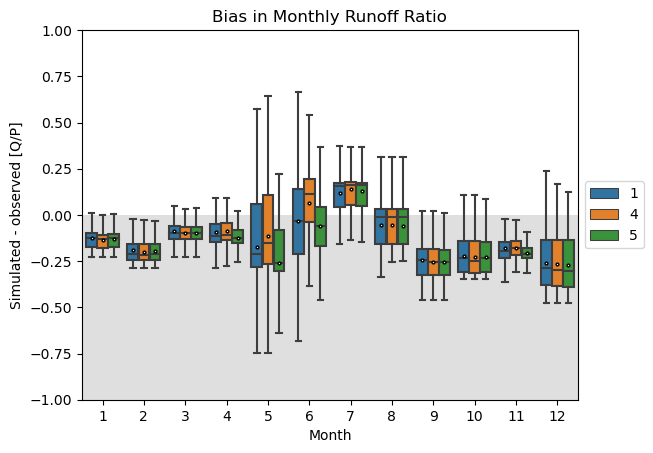

In [188]:
# Box plots
target_monthly_metrics = ['Q_mean_bias', 'high_flow_freq_bias', 'RR_bias']
fig_title = ['Bias in Monthly Qmean', 'Bias in Monthly High Flow Frequency', 'Bias in Monthly Runoff Ratio']
ylabel = ['Simulated - observed [m]', 'Simulated - observed [-]', 'Simulated - observed [Q/P]']
my_pal = ["#BCBCBC", "#3388B6", "#FF993E"]
ymin = [-0.0002, -0.2, -1]
ymax = [0.0002, 0.4, 1]
# results_monthly_metrics['senario_id']==1 | results_monthly_metrics['senario_id']==3 | results_monthly_metrics['senario_id']==5
subset_results_monthly_metrics = results_monthly_metrics[(results_monthly_metrics['senario_id']==1) | (results_monthly_metrics['senario_id']==4) | (results_monthly_metrics['senario_id']==5)]

for j in range(len(target_monthly_metrics)):
    plt.figure()
    plt.axhspan(ymin=-10, ymax=0, facecolor='gray', alpha=0.25, zorder=-1)
    boxplot = sns.boxplot(x='Month', y=target_monthly_metrics[j], data=subset_results_monthly_metrics, hue='senario_id', showfliers = False,zorder=10, showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"2"})
    boxplot.set_ylim([ymin[j], ymax[j]])
    boxplot.set_ylabel(ylabel[j])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(fig_title[j])
    fig.savefig(os.path.join(out_path, f'MonthlyBoxPlot_{target_monthly_metrics[j]}.png'))
